# Project: Investigate a Dataset - TMDb
Yuqing Wang 17.06.2022
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.


### Question(s) for Analysis
Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
##!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In this section, TMDb will be checked for cleanliness, trimed and cleaned. 


### General Properties

In [99]:
# check data types, missing or possibly errant data.
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [100]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [101]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [102]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
 

#### Action 1: Seperate column ''genres'
In order to analyse the relationship between popularity and genres, we need to seperate column 'genres' into independent columns 

In [103]:
# drop data without genre
df.dropna(subset=["genres"],axis=0,inplace=True)

In [104]:
# check the result 
df.isnull().sum()

id                         0
imdb_id                    8
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      75
homepage                7912
director                  42
tagline                 2806
keywords                1475
overview                   3
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [105]:
# number of movies which has more than one genre
df['genres'].str.contains('|').value_counts().sum()

10843

In [106]:
#splite genres for a movie which has multiple genres
df_genres=df['genres'].str.split('|', expand=True)

In [107]:
df_genres.tail()

,0,1,2,3,4
10861,Documentary,None,None,None,None
10862,Action,Adventure,Drama,None,None
10863,Mystery,Comedy,None,None,None
10864,Action,Comedy,None,None,None
10865,Horror,None,None,None,None


In [108]:
# assign column names to seperated genre
df_genres.columns = ['G_One', 'G_Two', 'G_Three', 'G_Four', 'G_Five']

In [109]:
df_genres.head()

,G_One,G_Two,G_Three,G_Four,G_Five
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [110]:
#join the seperated genres to original dataframe
df = pd.concat([df,df_genres], axis=1)

In [111]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,G_One,G_Two,G_Three,G_Four,G_Five
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None


In [232]:
# Each genre is regarded as a independent sample. 
#a movie with multiple genres were regarded as several samples.
df_1=df[['release_year','G_One','popularity']]
df_2=df[['release_year','G_Two','popularity']]
df_2.rename(columns={'G_Two': 'G_One'},inplace=True)
df_3=df[['release_year','G_Three','popularity']]
df_3.rename(columns={'G_Three': 'G_One'},inplace=True)
df_4=df[['release_year','G_Four','popularity']]
df_4.rename(columns={'G_Four': 'G_One'},inplace=True)
df_5=df[['release_year','G_Five','popularity']]
df_5.rename(columns={'G_Five': 'G_One'},inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [233]:
# append dataframe
df_1 = df_2.append(df_1) 
df_1 = df_3.append(df_1) 
df_1 = df_4.append(df_1) 
df_1 = df_5.append(df_1) 
df_1.tail()

,release_year,G_One,popularity
10861,1966,Documentary,0.080598
10862,1966,Action,0.065543
10863,1966,Mystery,0.065141
10864,1966,Action,0.064317
10865,1966,Horror,0.035919


In [203]:
# drop null rows
df_1.dropna(subset=["G_One"],axis=0,inplace=True)

In [204]:
#check results
df_1.isnull().sum()

release_year    0
G_One           0
popularity      0
dtype: int64

#### Action 2: Drop zero budget and runtime
The runtime and budget could not be zero. So these rows will be deleted for analysis of second question.

In [179]:
# count of 0 budget movies
df[(df.budget == 0)].index.value_counts().sum()

5674

In [180]:
# drop 0 budget movies
df_q2 =  df.drop(index = df[(df.budget == 0)].index.tolist())

In [181]:
#check result
df_q2[(df_q2.budget == 0)].index.tolist()

[]

In [182]:
# count of 0 runtime movies
df[(df.runtime == 0)].index.value_counts().sum()

30

In [183]:
# drop 0 runtime movies 
df_q2 =  df_q2.drop(index = df_q2[(df_q2.runtime == 0)].index.tolist())

In [184]:
#check result
df_q2[(df_q2.runtime == 0)].index.tolist()

[]

In [185]:
# df_q2 is dataframe of movies with budget and runtime
df_q2.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5166.000000,5166.000000,5.166000e+03,5.166000e+03,5166.000000,5166.000000,5166.000000,5166.000000,5.166000e+03,5.166000e+03
mean,45481.421796,0.992874,3.076106e+07,8.033782e+07,107.162408,408.893148,6.033488,2001.255517,3.691387e+07,1.022548e+08
std,72671.103739,1.329506,3.890790e+07,1.595210e+08,22.665516,788.480799,0.882534,11.771006,4.196267e+07,1.959607e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,8840.500000,0.348233,6.000000e+06,0.000000e+00,93.000000,36.000000,5.500000,1996.000000,8.109572e+06,0.000000e+00
50%,13004.500000,0.624960,1.700000e+07,2.101034e+07,103.000000,122.000000,6.100000,2005.000000,2.274082e+07,2.872138e+07
75%,44935.250000,1.152807,4.000000e+07,8.950402e+07,117.000000,402.000000,6.600000,2010.000000,5.008384e+07,1.134411e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


#### Action 3: Classify revenue level
To analyse the relationship between high-revenue-movie and each factor, we need to classify the revenue level

In [190]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0.000000e+00 ,2.101034e+07 , 8.950402e+07 ,2.781506e+09]

In [193]:
# Labels for the four revenue level groups
bin_names = ['low', 'medium', 'high']

In [194]:
# Creates revenue_levels column
df_q3['revenue_levels'] = pd.cut(df_q2['revenue'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_q3.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_average,release_year,budget_adj,revenue_adj,G_One,G_Two,G_Three,G_Four,G_Five,revenue_levels
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,high
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,high
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None,high
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None,high
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None,high


In [195]:
#df_q4 is dataframe with high revenue movies
df_q4 =  df_q3.drop(index = df_q3[(df_q3.revenue < 8.950402e+07)].index.tolist())

In [196]:
df_q4.shape

(1292, 27)

<a id='eda'></a>
## Exploratory Data Analysis

In this section, the trends are shown in the varied visualizations. 


### Research Question 1 (Which genres are most popular from year to year?)

In [206]:
df_1.G_One.unique()

array(['Mystery', 'Fantasy', 'Thriller', 'Family', 'Science Fiction',
       'Drama', 'History', 'Music', 'Comedy', 'Romance', 'Action', 'War',
       'Horror', 'Adventure', 'Crime', 'Animation', 'TV Movie', 'Foreign',
       'Western', 'Documentary'], dtype=object)

In [207]:
df_1.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1980, 2007, 1979,
       1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989, 1991,
       1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961, 1960,
       1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978, 1966,
       1972])

There are 20 kinds of genres in 56 years. 

In [244]:
#sort these movies by year
data_group_var=df_1.groupby(['release_year','G_One'])\
                            [['popularity']].\
                            mean()

In [210]:
data_group_var

popularity
release_year G_One                      
1960         Action             0.590724
             Adventure          0.700981
             Comedy             0.396000
             Crime              0.346480
             Drama              0.566305
             Family             0.278064
             Fantasy            0.428247
             Foreign            0.194948
             History            0.412364
             Horror             0.591450
             Music              0.423531
             Romance            0.541228
             Science Fiction    0.327905
             Thriller           0.811910
             War                0.225863
             Western            0.567759
1961         Action             0.365913
             Adventure          0.767323
             Animation          2.631987
             Comedy             0.679838
             Crime              0.806519
             Drama              0.432233
             Family             0.755722
             Fantasy            0.154073
             Foreign            0.113651
             History            0.334463
             Horror             0.254578
             Music              0.564749
             Mystery            0.712793
             Romance            0.426036
...                                  ...
2014         Fantasy            1.829351
             History            1.076321
             Horror             0.483898
             Music              0.652112
             Mystery            1.013722
             Romance            0.629171
             Science Fiction    2.294452
             TV Movie           0.296038
             Thriller           1.041924
             War                1.481125
             Western            0.673947
2015         Action             2.251415
             Adventure          3.283786
             Animation          1.146298
             Comedy             0.938527
             Crime              1.722032
             Documentary        0.190483
             Drama              0.937877
             Family             1.369038
             Fantasy            1.740228
             History            1.007905
             Horror             0.476670
             Music              0.635101
             Mystery            1.214847
             Romance            0.948865
             Science Fiction    2.245603
             TV Movie           0.260574
             Thriller           1.401877
             War                1.284511
             Western            3.178796

[1049 rows x 1 columns]

In [236]:
# reset index of dataframe
flat_data_group_var=data_group_var.reset_index()
flat_data_group_var.tail()

,release_year,G_One,popularity
1044,2015,Science Fiction,2.245603
1045,2015,TV Movie,0.260574
1046,2015,Thriller,1.401877
1047,2015,War,1.284511
1048,2015,Western,3.178796


In [237]:
#get most popular genre of each year using rank
df_fav=flat_data_group_var[flat_data_group_var.groupby(['release_year'])['popularity'].rank(method='first',ascending=False)==1]

In [238]:
df_fav

,release_year,G_One,popularity
13,1960,Thriller,0.811910
18,1961,Animation,2.631987
34,1962,Adventure,0.942513
52,1963,Animation,2.180410
83,1964,War,0.930959
95,1965,Music,0.968850
105,1966,Animation,0.585717
123,1967,Animation,1.348805
149,1968,Mystery,1.519456
159,1969,Crime,0.948020


In [239]:
# summarize the count of most popular genre in these year
df_fav_count=df_fav.G_One.value_counts()

In [240]:
df_fav_count

Adventure          14
Animation          10
Fantasy             8
Crime               5
Action              3
War                 3
Family              3
Western             2
Mystery             2
Science Fiction     2
Music               2
Thriller            1
History             1
Name: G_One, dtype: int64

Transform count into dataframe

In [218]:
# reset index
df_fav_count2 = df_fav_count.reset_index()
df_fav_count2.columns = ['genres', 'count']
df_fav_count2

,genres,count
0,Adventure,14
1,Animation,10
2,Fantasy,8
3,Crime,5
4,Action,3
5,War,3
6,Family,3
7,Western,2
8,Mystery,2
9,Science Fiction,2


In [220]:
# get collect genres as array
a=df_fav_count2.iloc[:, 0].tolist()
a=np.array(a)
a

array(['Adventure', 'Animation', 'Fantasy', 'Crime', 'Action', 'War',
       'Family', 'Western', 'Mystery', 'Science Fiction', 'Music',
       'Thriller', 'History'], 
      dtype='<U15')

In [221]:
# collect counts as array
b=df_fav_count2.iloc[:,1].tolist()
b=np.array(b)
b

array([14, 10,  8,  5,  3,  3,  3,  2,  2,  2,  2,  1,  1])

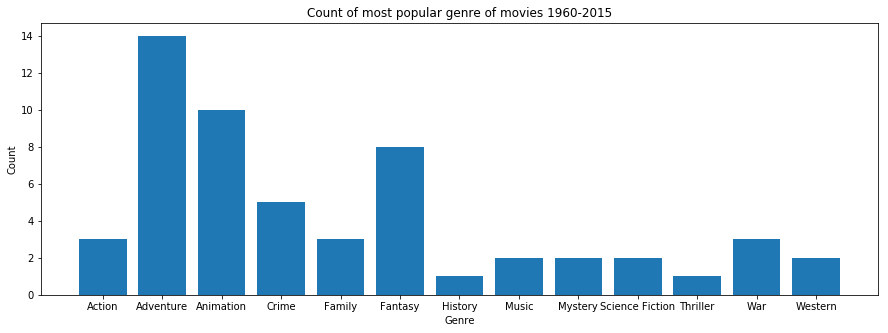

In [222]:
#visualize result of the analyses 
plt.figure(figsize=(15,5))
plt.bar(a, b)
plt.title("Count of most popular genre of movies 1960-2015")
plt.xlabel("Genre")
plt.ylabel("Count");

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

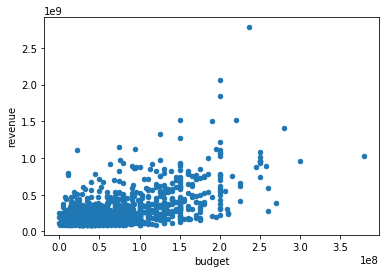

In [254]:
df_q4.plot(x="budget", y="revenue", kind="scatter");

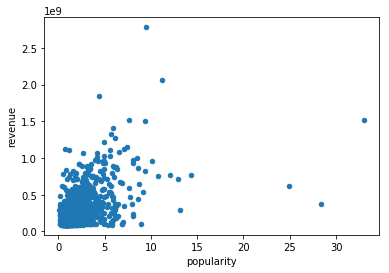

In [253]:
df_q4.plot(x="popularity", y="revenue", kind="scatter");

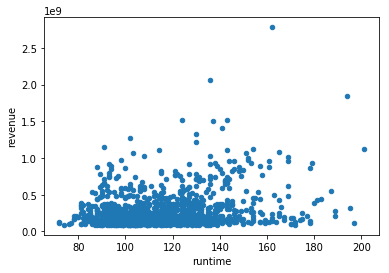

In [252]:
df_q4.plot(x="runtime", y="revenue", kind="scatter");

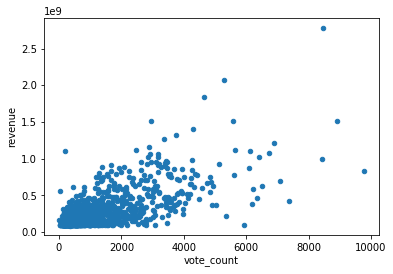

In [251]:
df_q4.plot(x="vote_count", y="revenue", kind="scatter");

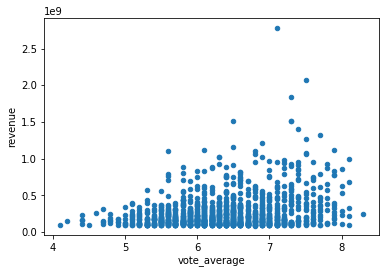

In [250]:
df_q4.plot(x="vote_average", y="revenue", kind="scatter");

This plot doesn't show enough relationship

<a id='conclusions'></a>
## Conclusions

### Topic 1: Most popular genres each year
From the bar chart we can see that the most popular genre these years is Adventure, which was the most popular genre in 14 years.

The second popular genre is Animation, which was the the most popular genre 10 times.

The third popular genre is Fantasy. It has became the most popular genres in 8 years.

20 Genres was counted in this Analyses. Only 12 genres were shown in the final result.

From 2008-2015, Adventure is very popular. It became the most popular genre 6 times in these 8 year.

Fantasy is the most popular genres in 2001-2007.


Additionaly,we can see from the result that genres, which can stimulate people's emotions and attract attention are more popular. Documentary, Romance are not porpular.


We don't know the weight of each genres for multiple-genre-movies. This could be the limitation of this Analysis.
 
### Topic 2: Properties associated with high revenues
From the scatters we could see that the popularity has positive relationship with the revenues.

The budget and vote_count are also associated with high revenues.

Runtime has less relationship with high revenues.

Vote-average seems to be not associated with high revenes.

## Submitting Project 

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## Reference
NA